<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Week-6-Mini-project-Notebook" data-toc-modified-id="Week-6-Mini-project-Notebook-1">Week 6 Mini-project Notebook</a></span><ul class="toc-item"><li><span><a href="#Author:-Alexander-Hernandez" data-toc-modified-id="Author:-Alexander-Hernandez-1.1">Author: Alexander Hernandez</a></span><ul class="toc-item"><li><span><a href="#Dataset-Used:-World-indicators-dataset" data-toc-modified-id="Dataset-Used:-World-indicators-dataset-1.1.1">Dataset Used: World indicators dataset</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.1.2">Load the data</a></span></li><li><span><a href="#Initial-exploration" data-toc-modified-id="Initial-exploration-1.1.3">Initial exploration</a></span></li></ul></li><li><span><a href="#Selecting-a-data-science-question-to-explore" data-toc-modified-id="Selecting-a-data-science-question-to-explore-1.2">Selecting a data science question to explore</a></span><ul class="toc-item"><li><span><a href="#Primary-Question:" data-toc-modified-id="Primary-Question:-1.2.1">Primary Question:</a></span></li><li><span><a href="#Secondary-Question:" data-toc-modified-id="Secondary-Question:-1.2.2">Secondary Question:</a></span></li></ul></li><li><span><a href="#Further-exploration,-manipulation,-and-analysis" data-toc-modified-id="Further-exploration,-manipulation,-and-analysis-1.3">Further exploration, manipulation, and analysis</a></span></li></ul></li><li><span><a href="#Next-steps:" data-toc-modified-id="Next-steps:-2">Next steps:</a></span></li></ul></div>

# Week 6 Mini-project Notebook
## Author: Alexander Hernandez

### Dataset Used: World indicators dataset

In [1]:
# Import libraries and select plotting style settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

### Load the data

In [2]:
# Read data into pandas dataframe variable named data
data_location = '../Week5-Visualization/world-development-indicators/Indicators.csv'
data = pd.read_csv(data_location)

### Initial exploration
As with any data science endeavor, this project begins with an initial exploration of the data. Being generally unfamiliar with the dataset, the primary goal of this "first look" is to become familiar with the contents of the dataset and to explore the format of its contents.

In [3]:
data.shape

(5656458, 6)

In [4]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
# Return a list containing the column names
list(data.columns)

['CountryName',
 'CountryCode',
 'IndicatorName',
 'IndicatorCode',
 'Year',
 'Value']

The dataset contains over 5 and a half million rows across 6 columns. This is too much data to manually sort through, so the top 5 rows give an idea of the contents and formatting. Listing the column headings double checks what variables we have to work with. 

In [6]:
# Drop any rows with missing data for ease of future analysis
data.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

No missing values in the entire dataset.

From the first several rows of the dataframe and the column names, it is clear that exploring the available indicator names will provide a starting point for developing an interesting data science question to explore.

In [7]:
# Create a variable containing a list of each unique indicator name
indicators = data['IndicatorName'].unique().tolist()

# Print the indicators list with each element on a new line
print(*indicators, sep='\n')

Adolescent fertility rate (births per 1,000 women ages 15-19)
Age dependency ratio (% of working-age population)
Age dependency ratio, old (% of working-age population)
Age dependency ratio, young (% of working-age population)
Arms exports (SIPRI trend indicator values)
Arms imports (SIPRI trend indicator values)
Birth rate, crude (per 1,000 people)
CO2 emissions (kt)
CO2 emissions (metric tons per capita)
CO2 emissions from gaseous fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (kt)
CO2 emissions from solid fuel consumption (% of total)
Death rate, crude (per 1,000 people)
Fertility rate, total (births per woman)
Fixed telephone subscriptions
Fixed telephone subscriptions (per 100 people)
Hospital beds (per 1,000 people)
International migrant stock (% of population)
International migrant stock, total
Life expectancy at birth, female (years)
Life expectancy at birth, male (years)
Life expectancy at birth,

In [8]:
# Check how many indicators are in the dataset
len(indicators)

1344

After sorting through this list of available indicators, there are clearly many interesting relationships that could be explored among the 1,344 indicators. Below, two research questions are defined and the indicators that will be used to explore these questions are specified.

## Selecting a data science question to explore

### Primary Question: 
Is there a statistically significant relationship between the birth rate of a country and its life expectancy?
- To explore this question, the following indicators will be used:
    1. Birth rate, crude (per 1,000 people)
    2. Life expectancy at birth, total (years)
    
***Hypothesis:***
Yes, birth rate and life expectancy will be inversely correlated. That is, countries with higher birth rates will  have shorter life expectancies.

### Secondary Question:
Is there a relationship between either the birth rate or life expectancy of a country and the percentage of land area devoted to agriculture?
- To explore this question, the following indicators:
    1. Birth rate, crude (per 1,000 people)
    2. Life expectancy at birth, total (years)
    3. Agricultural land (% of land area)
    
***Hypothesis:*** 
Yes, the percentage of a country's land used for agriculture will be positively correlated with birth rate, and inversely correlated with life expectancy. That is, countries with higher percentages of agricultural land will have higher birth rates and lower life expectancies.

## Further exploration, manipulation, and analysis

In order to isolate the data for the primary research question, create a filter for both birth rate and life expectancy indicators. Using these filters, create two new dataframes (one for each indicator). Then, merge these two dataframes on the CountryName column.

In [9]:
# Retreive birth rate data using a filter
birth_filter = data['IndicatorName'].str.contains('Birth rate, crude')
birth_data = data[birth_filter]

In [10]:
birth_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,47.697888
84,Caribbean small states,CSS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,40.017001
164,Central Europe and the Baltics,CEB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,19.117435
236,East Asia & Pacific (all income levels),EAS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,26.362350
359,East Asia & Pacific (developing only),EAP,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,26.635950


In [11]:
# Rename columns for ease of use and understanding
birth_data = birth_data.rename(columns={'CountryName':'Country', 'CountryCode':'Country code', 'Value':'Birth rate'})
birth_data.head()

,Country,Country code,IndicatorName,IndicatorCode,Year,Birth rate
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,47.697888
84,Caribbean small states,CSS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,40.017001
164,Central Europe and the Baltics,CEB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,19.117435
236,East Asia & Pacific (all income levels),EAS,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,26.362350
359,East Asia & Pacific (developing only),EAP,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,26.635950


In [12]:
# Drop unnecessary columns
birth_data = birth_data.drop(columns=['IndicatorName', 'IndicatorCode'])
birth_data.head()

,Country,Country code,Year,Birth rate
6,Arab World,ARB,1960,47.697888
84,Caribbean small states,CSS,1960,40.017001
164,Central Europe and the Baltics,CEB,1960,19.117435
236,East Asia & Pacific (all income levels),EAS,1960,26.362350
359,East Asia & Pacific (developing only),EAP,1960,26.635950


In [13]:
# Retrieve life expectancy data using a filter
life_filter = data['IndicatorName'].str.contains('Life expectancy at birth, total')
life_data = data[life_filter]

In [14]:
life_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,46.847059
103,Caribbean small states,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.271795
188,Central Europe and the Baltics,CEB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,67.823762
282,East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,48.298317
400,East Asia & Pacific (developing only),EAP,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,45.549658


In [15]:
# Rename columns for ease of use and understanding
life_data = life_data.rename(columns={'CountryName':'Country', 'Value':'Life expectancy'})
life_data.head()

,Country,CountryCode,IndicatorName,IndicatorCode,Year,Life expectancy
22,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,46.847059
103,Caribbean small states,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,62.271795
188,Central Europe and the Baltics,CEB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,67.823762
282,East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,48.298317
400,East Asia & Pacific (developing only),EAP,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,45.549658


In [16]:
# Drop unnecessary columns
life_data = life_data.drop(columns=['IndicatorName', 'CountryCode', 'IndicatorCode'])
life_data.head()

,Country,Year,Life expectancy
22,Arab World,1960,46.847059
103,Caribbean small states,1960,62.271795
188,Central Europe and the Baltics,1960,67.823762
282,East Asia & Pacific (all income levels),1960,48.298317
400,East Asia & Pacific (developing only),1960,45.549658


Before merging these two dataframes, it might be helpful to have some quick statistics for later use.

In [17]:
# Descriptive statistics for birth rate data
birth_data.describe()

,Year,Birth rate
count,12485.000000,12485.000000
mean,1986.771085,29.259449
std,15.579292,12.939121
min,1960.000000,6.900000
25%,1973.000000,17.400000
50%,1987.000000,28.671000
75%,2000.000000,41.174000
max,2013.000000,57.637000


In [18]:
# Descriptive statistics for life expectancy
life_data.describe()

,Year,Life expectancy
count,12304.000000,12304.000000
mean,1986.784379,63.278799
std,15.587910,11.276166
min,1960.000000,19.265512
25%,1973.000000,55.080878
50%,1987.000000,66.276890
75%,2000.000000,71.786695
max,2013.000000,83.831707


In [19]:
# Number of entries for birth rate
len(birth_data)

12485

In [20]:
# Number of entries for life expectancy
len(life_data)

12304

In [21]:
# Merge birth rate and life expectancy dataframes on Country and Year
birth_and_life = pd.merge(birth_data, life_data, how='inner', on=['Country', 'Year'])

In [22]:
birth_and_life

,Country,Country code,Year,Birth rate,Life expectancy
0,Arab World,ARB,1960,47.697888,46.847059
1,Caribbean small states,CSS,1960,40.017001,62.271795
2,Central Europe and the Baltics,CEB,1960,19.117435,67.823762
3,East Asia & Pacific (all income levels),EAS,1960,26.362350,48.298317
4,East Asia & Pacific (developing only),EAP,1960,26.635950,45.549658
5,Euro area,EMU,1960,18.838713,69.273711
6,Europe & Central Asia (all income levels),ECS,1960,22.141599,67.030027
7,Europe & Central Asia (developing only),ECA,1960,30.390165,61.210531
8,European Union,EUU,1960,18.579592,69.279544
9,Fragile and conflict affected situations,FCS,1960,46.458639,41.411819


In [23]:
birth_and_life.isnull().any()

Country            False
Country code       False
Year               False
Birth rate         False
Life expectancy    False
dtype: bool

No null values in our merged dataset, as expected.

In [24]:
birth_and_life.shape

(12267, 5)

In [25]:
country_count = birth_and_life['Country'].unique().tolist()

In [26]:
len(country_count)

240

There is data for 240 unique countries.

Limit the data to the most recent 3 years of data available

In [27]:
# Find the most recent year of data available
birth_and_life['Year'].max()

2013

In [28]:
# Isolate data for 2011, 2012, and 2013, individually
data_2011 = birth_and_life[birth_and_life['Year'] == 2011]
data_2012 = birth_and_life[birth_and_life['Year'] == 2012]
data_2013 = birth_and_life[birth_and_life['Year'] == 2013]

In [29]:
data_2011.head()

,Country,Country code,Year,Birth rate,Life expectancy
11572,Arab World,ARB,2011,27.038467,70.219347
11573,Caribbean small states,CSS,2011,16.095443,71.572063
11574,Central Europe and the Baltics,CEB,2011,9.936685,75.936907
11575,East Asia & Pacific (all income levels),EAS,2011,13.802222,74.267169
11576,East Asia & Pacific (developing only),EAP,2011,14.344617,73.346099


In [30]:
data_2011.tail()

,Country,Country code,Year,Birth rate,Life expectancy
11801,Virgin Islands (U.S.),VIR,2011,11.100,79.373171
11802,West Bank and Gaza,WBG,2011,30.922,72.829439
11803,"Yemen, Rep.",YEM,2011,34.017,63.053537
11804,Zambia,ZMB,2011,41.415,57.422195
11805,Zimbabwe,ZWE,2011,36.264,51.600366


The years shown in the 2011 data excerpts suggest the filter was successful.

Calculate statistics for each year.

In [31]:
data_2011.describe()

,Year,Birth rate,Life expectancy
count,234.0,234.000000,234.000000
mean,2011.0,21.676216,70.639598
std,0.0,10.515015,8.583855
min,2011.0,8.100000,48.219756
25%,2011.0,12.332500,65.169433
50%,2011.0,19.220500,72.811427
75%,2011.0,29.209500,76.741463
max,2011.0,50.072000,83.421951


In [32]:
data_2012.describe()

,Year,Birth rate,Life expectancy
count,231.0,231.000000,231.000000
mean,2012.0,21.592795,70.844247
std,0.0,10.392902,8.441056
min,2012.0,8.200000,48.836000
25%,2012.0,12.361077,65.315232
50%,2012.0,19.414000,73.017878
75%,2012.0,29.276500,76.742976
max,2012.0,49.869000,83.480488


In [33]:
data_2013.describe()

,Year,Birth rate,Life expectancy
count,230.0,230.000000,230.000000
mean,2013.0,21.326970,71.061180
std,0.0,10.348449,8.295639
min,2013.0,7.900000,48.937927
25%,2013.0,12.191000,65.662384
50%,2013.0,19.360764,73.226866
75%,2013.0,29.007750,76.839835
max,2013.0,49.661000,83.831707


While these statistics only cover a few years of data, there are a few trends visible. First, the worldwide average for birth rate has declined very slightly over the three years. Conversely, the worldwide average life expectancy has increased slightly over the same time interval.

For each year, plot the birth rate vs life expectancy by country.

Text(0, 0.5, 'Life expectancy at birth, total (years)')

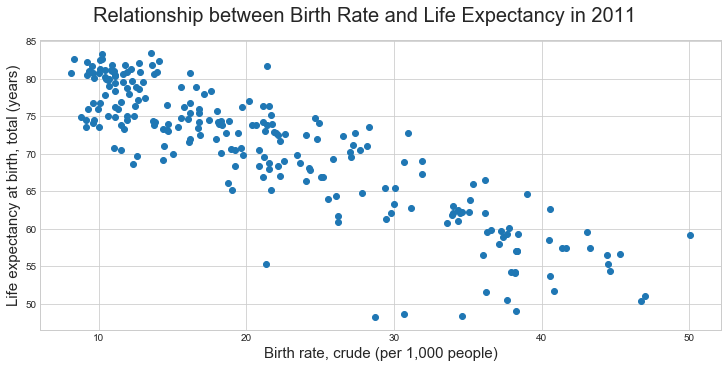

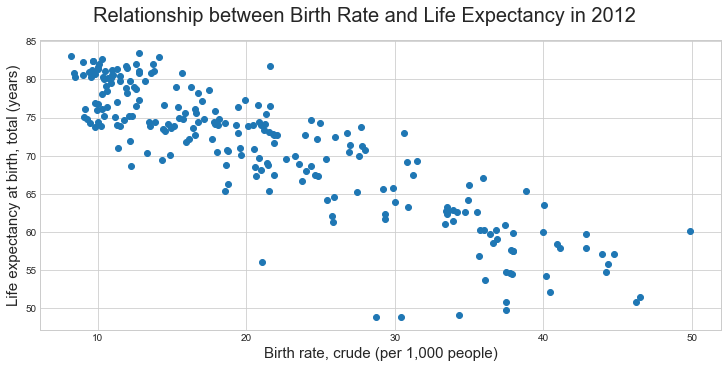

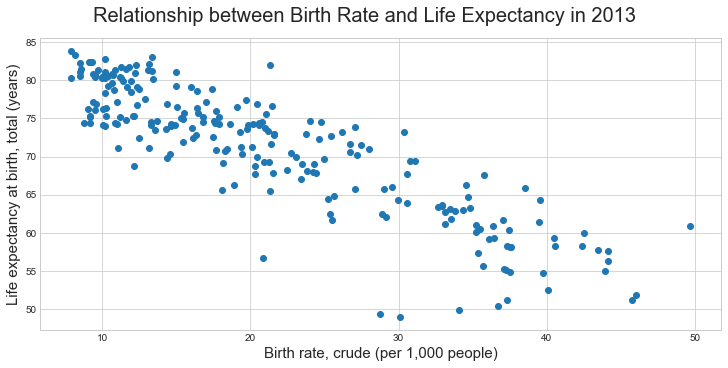

In [34]:
fig, ax1 = plt.subplots(1,1, figsize=(10,5), constrained_layout=True)
fig.suptitle('Relationship between Birth Rate and Life Expectancy in 2011', fontsize=20)
#figure.suptitle('Inverse Correlation of Birth Rate and Life Expectancy from 2011 to 2013')
# Plot birth rate vs life expectancy 2011
ax1.scatter(data_2011['Birth rate'], data_2011['Life expectancy'])
ax1.set_xlabel('Birth rate, crude (per 1,000 people)', fontsize=15)
ax1.set_ylabel('Life expectancy at birth, total (years)', fontsize=15)
#fig.savefig('Week 6 Mini Project - Scatterplot - 2011.jpeg')

# Plot birth rate vs life expectancy 2012
fig, ax2 = plt.subplots(1,1, figsize=(10,5), constrained_layout=True)
fig.suptitle('Relationship between Birth Rate and Life Expectancy in 2012', fontsize=20)
ax2.scatter(data_2012['Birth rate'], data_2012['Life expectancy'])
ax2.set_xlabel('Birth rate, crude (per 1,000 people)', fontsize=15)
ax2.set_ylabel('Life expectancy at birth, total (years)', fontsize=15)
#fig.savefig('Week 6 Mini Project - Scatterplot - 2012.jpeg')
# Plot birth rate vs life expectancy 2013
fig, ax3 = plt.subplots(1,1, figsize=(10,5), constrained_layout=True)
fig.suptitle('Relationship between Birth Rate and Life Expectancy in 2013', fontsize=20)
ax3.scatter(data_2013['Birth rate'], data_2013['Life expectancy'])
ax3.set_xlabel('Birth rate, crude (per 1,000 people)', fontsize=15)
ax3.set_ylabel('Life expectancy at birth, total (years)', fontsize=15)
#fig.savefig('Week 6 Mini Project - Scatterplot - 2013.jpeg')

In [35]:
# Compute correlation between birth rate and life expectancy 2011
data_2011.corr(method='pearson')

,Year,Birth rate,Life expectancy
Year,NaN,NaN,NaN
Birth rate,NaN,1.000000,-0.875963
Life expectancy,NaN,-0.875963,1.000000


In [36]:
# Compute correlation between birth rate and life expectancy 2012
data_2012.corr(method='pearson')

,Year,Birth rate,Life expectancy
Year,NaN,NaN,NaN
Birth rate,NaN,1.00000,-0.87579
Life expectancy,NaN,-0.87579,1.00000


In [37]:
# Compute correlation between birth rate and life expectancy 2013
data_2013.corr(method='pearson')

,Year,Birth rate,Life expectancy
Year,NaN,NaN,NaN
Birth rate,NaN,1.00000,-0.87595
Life expectancy,NaN,-0.87595,1.00000


The scatterplots indicate that for 2011, 2012, and 2013 there was an inverse relationship between birth rate and life expectancy. The correlation calculations above support this conclusion with fairly high negative correlations around -0.88. This analysis supports the initial hypothesis that these two indicators would be inversely related.

# Next steps:
consider trying to overlay the agricultural land % data on the scatterplot using the percentage as the bubble size.

figure out a way to highlight some of the dots in each region to give country names as a way of giving the gyst of that area's development.

In [38]:
agriculture_filter = data['IndicatorName'].str.contains('Agricultural land')
agriculture_data = data[agriculture_filter]
agriculture_data

# Remove the sq. km agricultural data to isolate the % of land agricultureal indicator
land_percent_filter = agriculture_data['IndicatorName'].str.contains('of land area')
agriculture_data = agriculture_data[land_percent_filter]
agriculture_data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
23192,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,30.944292
23285,Caribbean small states,CSS,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,5.518775
23377,Central Europe and the Baltics,CEB,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,64.667028
23456,East Asia & Pacific (all income levels),EAS,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,43.330691
23599,East Asia & Pacific (developing only),EAP,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,35.754940
23742,Euro area,EMU,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,56.341527
24095,European Union,EUU,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,54.831578
24227,Fragile and conflict affected situations,FCS,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,31.228969
24317,Heavily indebted poor countries (HIPC),HPC,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,35.380530
24435,High income,HIC,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,38.594973


In [39]:
# Confirm that only the desired indicator remains
agriculture_data['IndicatorName'].unique().tolist()

['Agricultural land (% of land area)']

In [40]:
agriculture_data.rename(columns={'CountryName':'Country', 'Value':'Agricultural land percent'}, inplace=True)
agriculture_data

,Country,CountryCode,IndicatorName,IndicatorCode,Year,Agricultural land percent
23192,Arab World,ARB,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,30.944292
23285,Caribbean small states,CSS,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,5.518775
23377,Central Europe and the Baltics,CEB,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,64.667028
23456,East Asia & Pacific (all income levels),EAS,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,43.330691
23599,East Asia & Pacific (developing only),EAP,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,35.754940
23742,Euro area,EMU,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,56.341527
24095,European Union,EUU,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,54.831578
24227,Fragile and conflict affected situations,FCS,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,31.228969
24317,Heavily indebted poor countries (HIPC),HPC,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,35.380530
24435,High income,HIC,Agricultural land (% of land area),AG.LND.AGRI.ZS,1961,38.594973


In [41]:
agriculture_data.drop(columns=['CountryCode', 'IndicatorName', 'IndicatorCode'], inplace=True)
agriculture_data

,Country,Year,Agricultural land percent
23192,Arab World,1961,30.944292
23285,Caribbean small states,1961,5.518775
23377,Central Europe and the Baltics,1961,64.667028
23456,East Asia & Pacific (all income levels),1961,43.330691
23599,East Asia & Pacific (developing only),1961,35.754940
23742,Euro area,1961,56.341527
24095,European Union,1961,54.831578
24227,Fragile and conflict affected situations,1961,31.228969
24317,Heavily indebted poor countries (HIPC),1961,35.380530
24435,High income,1961,38.594973


In [42]:
# Isolate agriculture data for 2011, 2012, and 2013 individually

ag_2011 = agriculture_data[agriculture_data['Year'] == 2011]
ag_2012 = agriculture_data[agriculture_data['Year'] == 2012]
ag_2013 = agriculture_data[agriculture_data['Year'] == 2013]

In [43]:
ag_2011 = ag_2011.drop(columns='Year')
ag_2012 = ag_2012.drop(columns='Year')
ag_2013 = ag_2013.drop(columns='Year')
display(ag_2011.head())
display(ag_2012.head())
ag_2013.head()

,Country,Agricultural land percent
5026241,Arab World,38.030748
5026756,Caribbean small states,6.206249
5027257,Central Europe and the Baltics,47.724198
5027836,East Asia & Pacific (all income levels),48.808362
5028411,East Asia & Pacific (developing only),47.871891


,Country,Agricultural land percent
5202310,Arab World,38.353421
5202817,Caribbean small states,6.196863
5203290,Central Europe and the Baltics,47.396449
5203877,East Asia & Pacific (all income levels),48.677462
5204449,East Asia & Pacific (developing only),47.945128


,Country,Agricultural land percent
5377447,Arab World,38.133138
5377923,Caribbean small states,6.221564
5378359,Central Europe and the Baltics,47.375686
5378890,East Asia & Pacific (all income levels),48.345959
5379424,East Asia & Pacific (developing only),48.002742


In [44]:
# Merge agriculture data with yearly data for birth rate and life expectancy
all_data_2011 = pd.merge(data_2011, ag_2011, on='Country', how='inner')
all_data_2012 = pd.merge(data_2012, ag_2012, on='Country', how='inner')
all_data_2013 = pd.merge(data_2013, ag_2013, on='Country', how='inner')
display(all_data_2011.head())
display(all_data_2012.head())
all_data_2013.head()

,Country,Country code,Year,Birth rate,Life expectancy,Agricultural land percent
0,Arab World,ARB,2011,27.038467,70.219347,38.030748
1,Caribbean small states,CSS,2011,16.095443,71.572063,6.206249
2,Central Europe and the Baltics,CEB,2011,9.936685,75.936907,47.724198
3,East Asia & Pacific (all income levels),EAS,2011,13.802222,74.267169,48.808362
4,East Asia & Pacific (developing only),EAP,2011,14.344617,73.346099,47.871891


,Country,Country code,Year,Birth rate,Life expectancy,Agricultural land percent
0,Arab World,ARB,2012,26.917208,70.428991,38.353421
1,Caribbean small states,CSS,2012,15.945389,71.743554,6.196863
2,Central Europe and the Baltics,CEB,2012,9.940011,76.022131,47.396449
3,East Asia & Pacific (all income levels),EAS,2012,13.860501,74.444570,48.677462
4,East Asia & Pacific (developing only),EAP,2012,14.391727,73.503406,47.945128


,Country,Country code,Year,Birth rate,Life expectancy,Agricultural land percent
0,Arab World,ARB,2013,26.704356,70.631305,38.133138
1,Caribbean small states,CSS,2013,15.469034,71.901964,6.221564
2,Central Europe and the Baltics,CEB,2013,9.505113,76.127583,47.375686
3,East Asia & Pacific (all income levels),EAS,2013,13.737984,74.604619,48.345959
4,East Asia & Pacific (developing only),EAP,2013,14.318272,73.657617,48.002742


In [45]:
display(all_data_2011.describe())
display(all_data_2012.describe())
display(all_data_2013.describe())


,Year,Birth rate,Life expectancy,Agricultural land percent
count,229.0,229.000000,229.000000,229.000000
mean,2011.0,21.728482,70.607257,38.367611
std,0.0,10.526069,8.557633,20.993092
min,2011.0,8.100000,48.219756,0.512821
25%,2011.0,12.317000,65.165610,22.292994
50%,2011.0,19.450000,72.793415,38.861055
75%,2011.0,29.377000,76.541195,53.838409
max,2011.0,50.072000,83.421951,82.996229


,Year,Birth rate,Life expectancy,Agricultural land percent
count,227.0,227.000000,227.000000,227.000000
mean,2012.0,21.608862,70.839874,38.715437
std,0.0,10.397930,8.407478,20.874911
min,2012.0,8.200000,48.836000,0.469231
25%,2012.0,12.361077,65.315232,23.015101
50%,2012.0,19.414000,73.017878,39.632122
75%,2012.0,29.276500,76.638976,53.507649
max,2012.0,49.869000,83.480488,81.304994


,Year,Birth rate,Life expectancy,Agricultural land percent
count,226.0,226.000000,226.000000,226.000000
mean,2013.0,21.341244,71.055500,38.792605
std,0.0,10.356123,8.261396,20.863906
min,2013.0,7.900000,48.937927,0.533333
25%,2013.0,12.191000,65.662384,22.951291
50%,2013.0,19.430033,73.226866,39.583028
75%,2013.0,29.007750,76.824579,54.212261
max,2013.0,49.661000,83.831707,82.064907


Text(0, 0.5, 'Life expectancy at birth, total (years)')

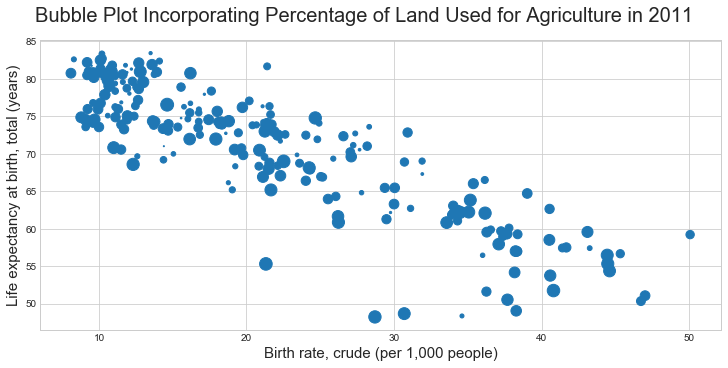

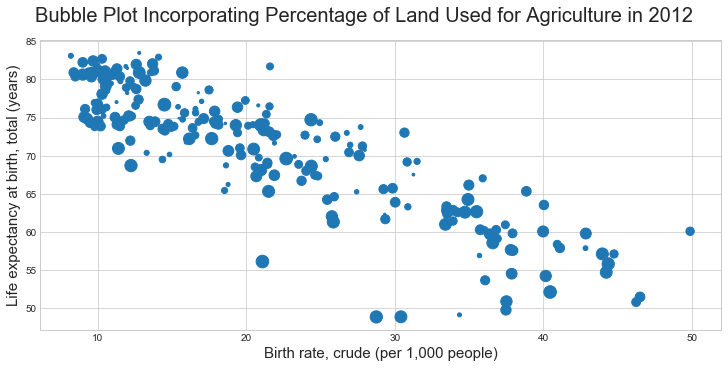

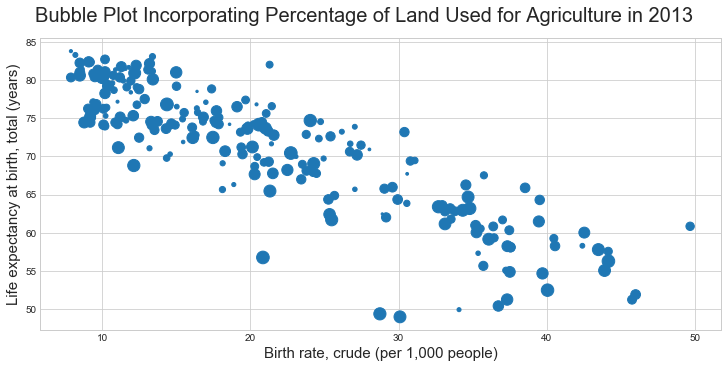

In [46]:
fig, ax1= plt.subplots(1,1, figsize=(10,5), constrained_layout=True)

#figure.suptitle('Inverse Correlation of Birth Rate and Life Expectancy from 2011 to 2013')
# Plot birth rate vs life expectancy 2011
ax1.scatter(all_data_2011['Birth rate'], all_data_2011['Life expectancy'], s=all_data_2011['Agricultural land percent']*2)
fig.suptitle('Bubble Plot Incorporating Percentage of Land Used for Agriculture in 2011', fontsize=20)
ax1.set_xlabel('Birth rate, crude (per 1,000 people)', fontsize=15)
ax1.set_ylabel('Life expectancy at birth, total (years)', fontsize=15)
#fig.savefig('Week 6 Mini Project - Bubble Plot - 2011.jpeg')

# Plot birth rate vs life expectancy 2012
fig, ax2= plt.subplots(1,1, figsize=(10,5), constrained_layout=True)
ax2.scatter(all_data_2012['Birth rate'], all_data_2012['Life expectancy'], s=all_data_2012['Agricultural land percent']*2)
fig.suptitle('Bubble Plot Incorporating Percentage of Land Used for Agriculture in 2012', fontsize=20)
ax2.set_xlabel('Birth rate, crude (per 1,000 people)', fontsize=15)
ax2.set_ylabel('Life expectancy at birth, total (years)', fontsize=15)
#fig.savefig('Week 6 Mini Project - Bubble Plot - 2012.jpeg')

# Plot birth rate vs life expectancy 2013
fig, ax3= plt.subplots(1,1, figsize=(10,5), constrained_layout=True)
ax3.scatter(all_data_2013['Birth rate'], all_data_2013['Life expectancy'], s=all_data_2013['Agricultural land percent']*2)
fig.suptitle('Bubble Plot Incorporating Percentage of Land Used for Agriculture in 2013', fontsize=20)
ax3.set_xlabel('Birth rate, crude (per 1,000 people)', fontsize=15)
ax3.set_ylabel('Life expectancy at birth, total (years)', fontsize=15)
#fig.savefig('Week 6 Mini Project - Bubble Plot - 2013.jpeg')

In [47]:
all_data_2011.corr(method='pearson')

,Year,Birth rate,Life expectancy,Agricultural land percent
Year,NaN,NaN,NaN,NaN
Birth rate,NaN,1.000000,-0.874113,0.18848
Life expectancy,NaN,-0.874113,1.000000,-0.27440
Agricultural land percent,NaN,0.188480,-0.274400,1.00000


In [48]:
all_data_2012.corr(method='pearson')

,Year,Birth rate,Life expectancy,Agricultural land percent
Year,NaN,NaN,NaN,NaN
Birth rate,NaN,1.000000,-0.874288,0.185185
Life expectancy,NaN,-0.874288,1.000000,-0.276955
Agricultural land percent,NaN,0.185185,-0.276955,1.000000


In [49]:
all_data_2013.corr(method='pearson')

,Year,Birth rate,Life expectancy,Agricultural land percent
Year,NaN,NaN,NaN,NaN
Birth rate,NaN,1.000000,-0.874504,0.190238
Life expectancy,NaN,-0.874504,1.000000,-0.274435
Agricultural land percent,NaN,0.190238,-0.274435,1.000000


From an initial interpretation of the new plots with agricultural land included, there is no striking relationship to be found between agricultural land and the other two variables. Calculating the correlations between all of the variables supported this interpretation of the plots. While there may be some minor correlation between agriculture and the other variables, this relationship is much weaker than the second hypothesis would have expected. Because of the weakness of these correlations, the analysis does not support the second hypothesis and the hypothesis is rejected. 